# Import Library and Data Source

In [40]:
!pip install empiricaldist

import matplotlib.pyplot as plt
import numpy as np 
from empiricaldist import Pmf, Cdf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

data = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [25]:
# for better visualization, there might be a good idea to rename some column into a more simple ones. I would like to rename the naive bayes classifier column for month 1 and 2.
df = data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'nb_classifier_month1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'nb_classifier_month2'}) 

# Basic statistical analysis and visualization

## Correlation Chart

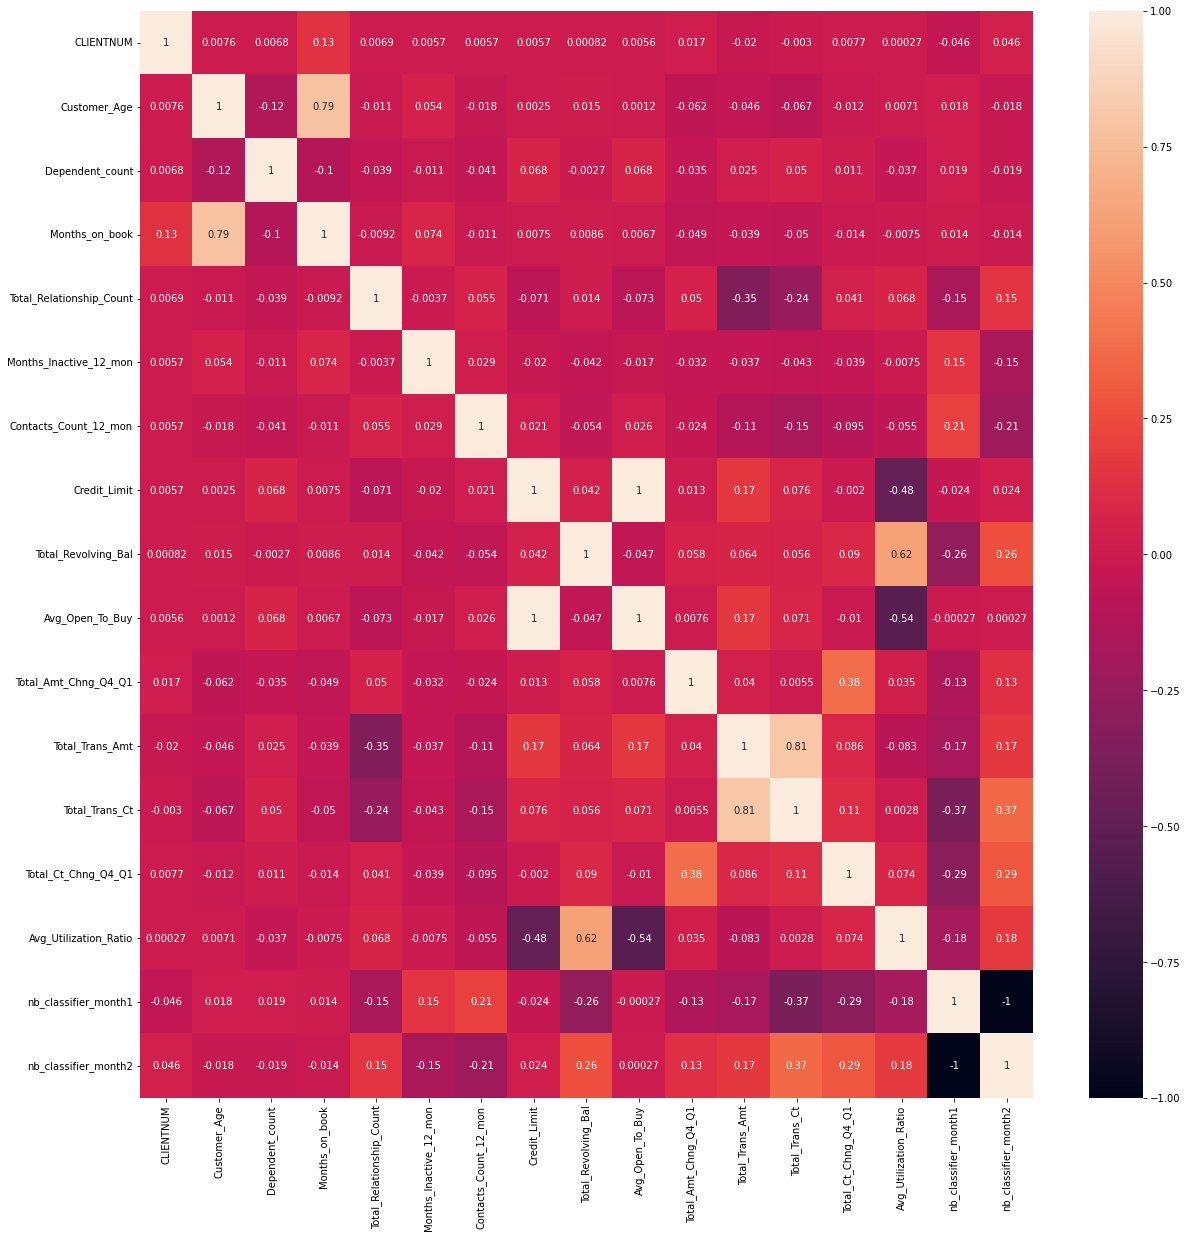

In [27]:
# personally I like to use correlation chart at the beginning, to better understand my priority of the variables that I would analyze first.  
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## Central Tendency and Dispersion 

In [48]:
# Mean of Customer_Age
mean = df['Customer_Age'].mean()
print("The mean of Customer_Age: {:.2f}".format(round(mean,2)))

# Mode of Customer_Age
mode = df['Customer_Age'].mode()
print("The mode of Customer_Age: {}".format(int(mode)))

# Mode of Customer_Age 
median = df['Customer_Age'].median()
print("The median of Customer_Age: {}".format(int(median)))

# The average of Credit_Limit in Existing Customer
ExistingCustomer = df[df['Attrition_Flag'] == 'Existing Customer']
mean_ExistingCustomer = ExistingCustomer['Credit_Limit'].mean()
print("The average Credit_Limit of Existing Customer: {:.2f}".format(round(mean_mer,2)))

# The average of Credit_Limit in Attrited Customer
AttritedCustomer = df[df['Attrition_Flag'] == 'Attrited Customer']
mean_AttritedCustomer = AttritedCustomer['Credit_Limit'].mean()
print("The average Credit_Limit of Attrited Customer: {:.2f}".format(round(mean_mer,2)))

The mean of Customer_Age: 46.33
The mode of Customer_Age: 44
The median of Customer_Age: 46
The average Credit_Limit of Existing Customer: 8136.04
The average Credit_Limit of Attrited Customer: 8136.04


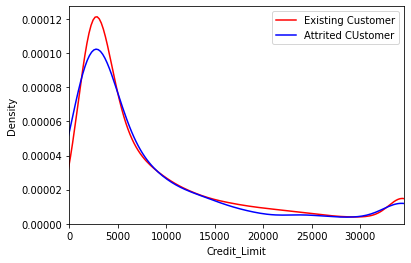

In [50]:
sns.kdeplot(ExistingCustomer['Credit_Limit'], color='red', label='Existing Customer').set(xlim=(0, ExistingCustomer['Credit_Limit'].max()))
sns.kdeplot(AttritedCustomer['Credit_Limit'], color='blue', label='Attrited CUstomer').set(xlim=(0, AttritedCustomer['Credit_Limit'].max()))
plt.legend()
plt.show()

## Probability Mass Function(PMF)

In [ ]:
# In spite of the project's objective, variables that have strong correlations are usually more interesting for me.  
# I am using PMF to visualize discrete data

In [28]:
# frequency chart
pmf_Customer_Age_fre = Pmf.from_seq(df['Customer_Age'], normalize=False)
display(pmf_Customer_Age_fre)

# normalize - percentage chart
pmf_Customer_Age = Pmf.from_seq(df['Customer_Age'])
pmf_Customer_Age

pmf_Customer_Age = pmf_Customer_Age.sort_values()
pmf_df = pd.DataFrame({'Customer_Age':pmf_Customer_Age.index, 'PMF':pmf_Customer_Age.values})

# visualization
px.bar(pmf_df, x='Customer_Age', y="PMF", title = "PMF for Customer_Ager",
       width= 500, height=500)

,probs
26,78
27,32
28,29
29,56
30,70
31,91
32,106
33,127
34,146
35,184


In [31]:
# frequency chart
pmf_Months_on_book_fre = Pmf.from_seq(df['Months_on_book'], normalize=False)
display(pmf_Months_on_book_fre)

# normalize - percentage chart
pmf_Months_on_book = Pmf.from_seq(df['Months_on_book'])
pmf_Months_on_book

pmf_Months_on_book = pmf_Months_on_book.sort_values()
pmf_df = pd.DataFrame({'Months_on_book':pmf_Months_on_book.index, 'PMF':pmf_Months_on_book.values})

# visualization
px.bar(pmf_df, x='Months_on_book', y="PMF", title = "PMF for Months_on_book",
       width= 500, height=500)

,probs
13,70
14,16
15,34
16,29
17,39
18,58
19,63
20,74
21,83
22,105


## Cumulative Distribution Function (CDF)

In [ ]:
# I am using CDF to visualize continous and high amount of data. This way the data is shown much clearer.  

In [33]:
cdf_Total_Trans_Amt	 = Cdf.from_seq(data['Total_Trans_Amt'])
cdf_Total_Trans_Amt	 = cdf_Total_Trans_Amt.sort_values()

# turn into dataframe
cdf_df = pd.DataFrame({'Total_Trans_Amt':cdf_Total_Trans_Amt.index, 'CDF':cdf_Total_Trans_Amt.values})
cdf_df

#visualization
px.line(cdf_df, y='CDF', x='Total_Trans_Amt', title = "Total_Trans_Amt", 
        width= 500, height=500)

In [34]:
cdf_Total_Trans_Ct	 = Cdf.from_seq(data['Total_Trans_Ct'])
cdf_Total_Trans_Ct	 = cdf_Total_Trans_Ct.sort_values()

# turn into dataframe
cdf_df = pd.DataFrame({'Total_Trans_Ct':cdf_Total_Trans_Ct.index, 'CDF':cdf_Total_Trans_Ct.values})
cdf_df

#visualization
px.line(cdf_df, y='CDF', x='Total_Trans_Ct', title = "Total_Trans_Ct", 
        width= 500, height=500)

## Normal Distribution

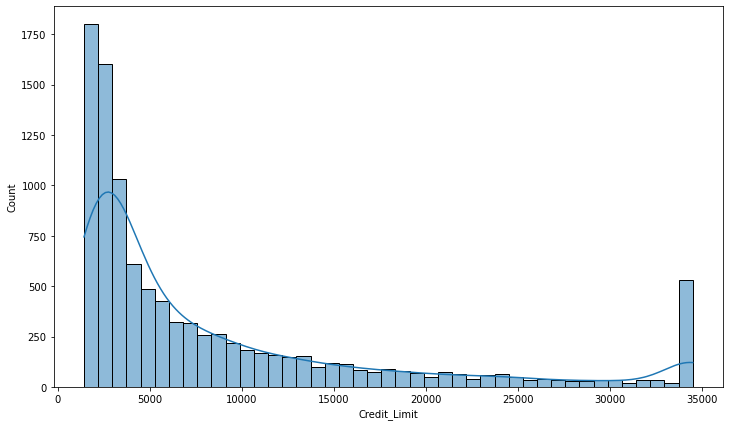

In [89]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Credit_Limit', kde=True)
plt.show()

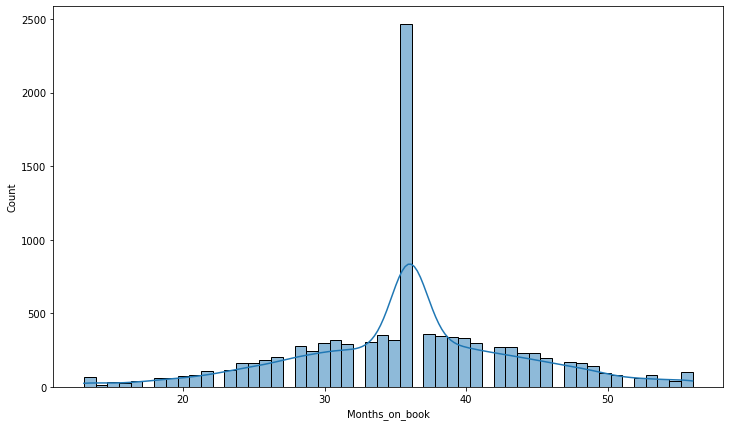

In [35]:
plt.figure(figsize=(12,7))
sns.histplot(data=data, x='Months_on_book', kde=True)
plt.show()

# A/B Test

## Sample and Population

In [51]:
sample_Avg_Open_To_Buy = data['Avg_Open_To_Buy'].sample(n=50)
SAB_mean = sample_Avg_Open_To_Buy.mean()
SAB_mean

6326.629999999999

In [52]:
population_Avg_Open_To_Buy = data['Avg_Open_To_Buy']
PAB_mean = population_Avg_Open_To_Buy.mean()
PAB_std = data['Avg_Open_To_Buy'].std()
PAB_std

9090.685323679128

In [53]:
sample_Credit_Limit = data['Credit_Limit'].sample(n=50)
SCL_mean = sample_Credit_Limit.mean()

In [54]:
population_Credit_Limit = data['Avg_Open_To_Buy']
PCL_mean = population_Credit_Limit.mean()
PCL_std = data['Credit_Limit'].std()
PCL_std

9088.776650223113

In [55]:
confidence_level = 0.95
alpha = 1-confidence_level


sample_AVB = data['Avg_Open_To_Buy'].sample(n=50)
sample_CL = data['Credit_Limit'].sample(n=50)

## Z Test

In [ ]:
# Sample Question: It is shown in BankChurn dataset that Credit_limit & Avg_open_to_buy have a high correlation. Find if the average sample of credit_limit is equal to the average of avg_open_to_buy.

In [ ]:
# I am using Z-test with two sample because  of the two variables, while both having > 30 amount of data. With this much dataset, I usually use Z-test for a better accuracy. I am using H0 for I assume that there 
# are no difference between the two variables.

In [56]:
ztest_Score, pvalue = ztest(x1=sample_AVB, x2=sample_CL, value=0, alternative='two-sided')
display(ztest(x1=sample_AVB, x2=sample_CL, value=0))

if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))

(0.2965145082687209, 0.7668371888781476)

Accept the hypothesis
Because the pvalue 0.77 < 0.05


# Advanced Visualization

## Understand the Correlation betweeen Total_Trans_Amt, Total_Trans_Ct, and Credit_Limit 

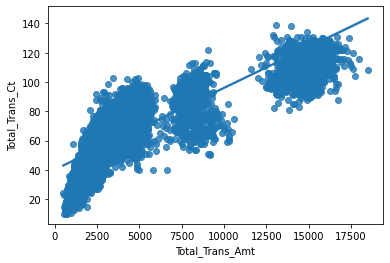

In [60]:
sns.regplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct')
plt.show()

In [62]:
fig = px.scatter(df, x='Total_Trans_Amt', y='Total_Trans_Ct', color='Attrition_Flag',
                 width=1200, height=500)
fig.show()

In [90]:
fig = px.scatter(df, x='Total_Trans_Amt', y='Total_Trans_Ct', size='Credit_Limit', width=1200, height=500)
fig.show()

In [ ]:
# Total_Trans_Amt and Total_Trans_Ct have a high and positive correlation for both Existing Customer and Attrited Customer. However, there is not much of correlation between the 'X' and 'Y' variables to Credit_Limit. 
# As we can see that the size of the bubble does not necessarily impacted by Total_Trans_Amt and Total_Trans_Ct. 

# Figuring out the outliers

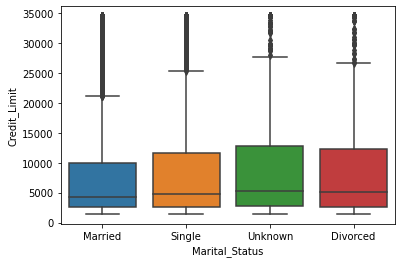

In [107]:
plt = sns.boxplot(data=df, x='Marital_Status', y='Credit_Limit')
plt

In [ ]:
# The median of Credit_Limit per Marital_Status is around 5k. The graphic above shows that the outliers would be in the higher values for Credit-Limit. To normalize the data we might have to take out the outliers first.
  